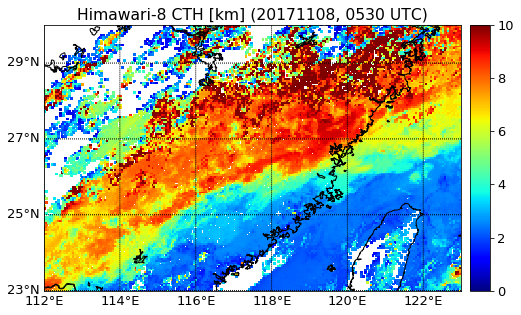

In [43]:
# Plot Himawari-8 CTH product (from Jaxa P-tree system)

import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB']='/home/jhlee/anaconda3/envs/JUPYTER/share/proj'
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset


# 글자크기 지정
plt.rc('font', size=13)


# Himawari-8 CTH 파일 읽기
dir = '/storage1/jhlee/NMSC_2018/Himawari_8_AHI/'
year = '2017'
date = '0921'
time = '0530'
fname = dir + 'NC_H08_'+year+date+'_'+time+'_L2CLP010_FLDK.02401_02401.nc'

f = Dataset(fname, 'r')
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]
cth = f.variables['CLTH'][:]


# Himawari-8 CTH 그림 그리기
plt.figure(figsize=(8,10))
llcrnrlat = 23
urcrnrlat = 30
llcrnrlon = 112
urcrnrlon = 123

map = Basemap(projection='cyl', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,\
              llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution='h')
x,y = map(lon,lat)

cs = map.pcolormesh(x,y, cth, cmap=plt.cm.jet)
map.drawcoastlines()
map.drawparallels(np.arange(llcrnrlat, urcrnrlat+1, 2), labels=[True,False,False,False])
map.drawmeridians(np.arange(llcrnrlon, urcrnrlon+1, 2), labels=[False,False,False,True])

cb = map.colorbar(cs, 'right')

plt.clim(0,10)
plt.title('Himawari-8 CTH [km] (%s%s, %s UTC)' %(year, date, time))
plt.savefig('../plots/Himawari8_CTH_'+year+date+time+'.png', dpi=300)
plt.show()